In [2]:
#データ成形
import numpy as np

def read_iris_data(file_name):
    uci_iris_data = []
    uci_iris_name = []
    uci_iris_target =[]
    uci_name_target_dict ={}

    for line in open(file_name):
        iris_data = line.strip().split(',')
        if iris_data == ['']:
            continue

        #data部分のパース
        data = np.array([float(i) for i in iris_data[:-1]])
        #target_names部分のパース
        name = iris_data[-1]

        #targetの計算
        if name not in uci_name_target_dict:
            uci_name_target_dict[name] = len(uci_name_target_dict)
        target = uci_name_target_dict[name]

           

        #各リストに追加
        uci_iris_data.append(data)
        uci_iris_name.append(name)
        uci_iris_target.append(target)
      

     #それぞれnumpyの配列へ変換
    uci_iris_data = np.array(uci_iris_data).reshape(len(uci_iris_data),4)
    uci_iris_name = np.array([i for i in uci_name_target_dict.keys()]).reshape(len(uci_name_target_dict),)
    uci_iris_target = np.array(uci_iris_target).reshape(len(uci_iris_target),)

     #outputをdict化
    iris = {
     'data':uci_iris_data,
     'target':uci_iris_target,
     'target_names':uci_iris_name
    }

    return iris
    
iris = read_iris_data('iris.data')



In [3]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
iris_data = iris["data"]
iris_target = iris["target"]
iris_target_names = iris["target_names"]

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
pd.DataFrame(data=iris_data,columns=["sepal length","sepal width","petal length","petal width"])

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
#データの準備
X = iris_data
Y = iris_target
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0)

In [7]:
#モデル作成（SVM）
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
#予測評価
from sklearn import metrics
predicted = model.predict(X_test)
metrics.accuracy_score(Y_test,predicted)

0.9736842105263158

Text(0,0.5,'sepal width')

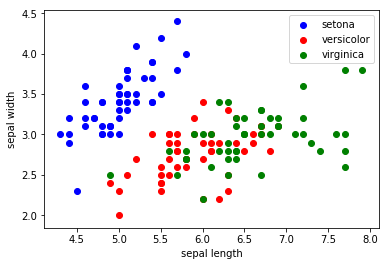

In [9]:
#データの可視化（sepal length,sepal width）
plt.scatter(X[:50,0],X[:50,1],color='blue',marker ='o',label='setona' )
plt.scatter(X[51:100,0],X[51:100,1],color='red',marker ='o',label='versicolor' )
plt.scatter(X[101:150,0],X[101:150,1],color='green',marker ='o',label='virginica' )
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')

Text(0,0.5,'petal width')

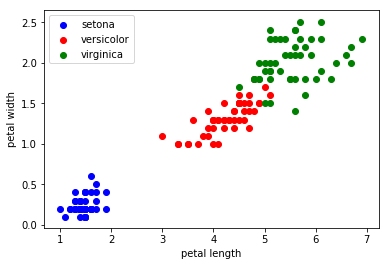

In [10]:
#データの可視化（petal length,petal width）
plt.scatter(X[:50,2],X[:50,3],color='blue',marker ='o',label='setona' )
plt.scatter(X[51:100,2],X[51:100,3],color='red',marker ='o',label='versicolor' )
plt.scatter(X[101:150,2],X[101:150,3],color='green',marker ='o',label='virginica' )
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')

In [11]:
#実際の品種と予測の品種を出力するプログラム
from numpy.random import *
df = pd.DataFrame(data=iris_data,columns=["sepal length","sepal width","petal length","petal width"])
df["label"]=[iris_target_names[i] for i in iris_target]


In [12]:
a=randint(150)

A_test = iris_data[a].reshape(-1,4)
features = model.predict(A_test)

if features == 0:
    print("予測結果は、Iris-setosaです。")

elif features == 1:
    print("予測結果は、Iris-versicolorです。")
    
elif features == 2:
    print("予測結果は、Iris-virginicaです。")


print("テストに使われた品種は"+df.at[a,'label']+"です。")

予測結果は、Iris-setosaです。
テストに使われた品種はIris-setosaです。


In [13]:
def experiment():
    a=randint(150)
    A_test = iris_data[a].reshape(-1,4)
    features = model.predict(A_test)

    if features == 0:
        print("予測結果は、Iris-setosaです。")

    elif features == 1:
        print("予測結果は、Iris-versicolorです。")
    
    elif features == 2:
        print("予測結果は、Iris-virginicaです。")


    print("テストに使われた品種は"+df.at[a,'label']+"です。")

In [14]:
experiment()

予測結果は、Iris-virginicaです。
テストに使われた品種はIris-virginicaです。


In [15]:
import pickle
filename = 'model.sav'
pickle.dump(model,open(filename,'wb'))